In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import random
import cv2
from tensorflow.keras import layers, models
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import zipfile
tf.__version__

'2.8.0'

In [4]:
TRAIN_PATH="D:\IBM Project\Dataset Plant Disease\veg-dataset\veg-dataset\train_set"
VEG_TRAIN_CLASS_NAMES=np.array(os.listdir(r"D:\IBM Project\Dataset Plant Disease\veg-dataset\veg-dataset\train_set"))
print("VEG_TRAIN_CLASS_NAMES")
VEG_TRAIN_CLASS_NAMES

VEG_TRAIN_CLASS_NAMES


array(['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
       'Potato___Early_blight', 'Potato___healthy',
       'Potato___Late_blight', 'Tomato___Bacterial_spot',
       'Tomato___Late_blight', 'Tomato___Leaf_Mold',
       'Tomato___Septoria_leaf_spot'], dtype='<U29')

In [5]:
TEST_PATH="D:\IBM Project\Dataset Plant Disease\veg-dataset\veg-dataset\test_set"
VEG_TEST_CLASS_NAMES=np.array(os.listdir(r"D:\IBM Project\Dataset Plant Disease\veg-dataset\veg-dataset\test_set"))
print("FRUIT_TEST_CLASS_NAMES")
VEG_TEST_CLASS_NAMES

FRUIT_TEST_CLASS_NAMES


array(['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
       'Potato___Early_blight', 'Potato___healthy',
       'Potato___Late_blight', 'Tomato___Bacterial_spot',
       'Tomato___Late_blight', 'Tomato___Leaf_Mold',
       'Tomato___Septoria_leaf_spot'], dtype='<U29')

In [6]:
files_train_count = []
for i,f in enumerate(VEG_TRAIN_CLASS_NAMES):
    #print(i,f)
    folder_path = os.path.join(r"D:\IBM Project\Dataset Plant Disease\veg-dataset\veg-dataset\train_set", str(f))
    for path in os.listdir(os.path.join(folder_path)):
        files_train_count.append(['{}/{}'.format(folder_path,path), f, i])
veg_train_df = pd.DataFrame(files_train_count, columns=['filepath', 'class_name', 'label'])
print("VEG TRAIN")
veg_train_df.head()

VEG TRAIN


,filepath,class_name,label
0,D:\IBM Project\Dataset Plant Disease\veg-datas...,"Pepper,_bell___Bacterial_spot",0
1,D:\IBM Project\Dataset Plant Disease\veg-datas...,"Pepper,_bell___Bacterial_spot",0
2,D:\IBM Project\Dataset Plant Disease\veg-datas...,"Pepper,_bell___Bacterial_spot",0
3,D:\IBM Project\Dataset Plant Disease\veg-datas...,"Pepper,_bell___Bacterial_spot",0
4,D:\IBM Project\Dataset Plant Disease\veg-datas...,"Pepper,_bell___Bacterial_spot",0


In [7]:
files_test_count = []
for i,f in enumerate(VEG_TEST_CLASS_NAMES):
    #print(i,f)
    folder_path = os.path.join(r"D:\IBM Project\Dataset Plant Disease\veg-dataset\veg-dataset\test_set", str(f))
    for path in os.listdir(os.path.join(folder_path)):
        files_test_count.append(['{}/{}'.format(folder_path,path), f, i])
veg_test_df = pd.DataFrame(files_test_count, columns=['filepath', 'class_name', 'label'])
print("VEG TEST")
veg_test_df.head()

VEG TEST


,filepath,class_name,label
0,D:\IBM Project\Dataset Plant Disease\veg-datas...,"Pepper,_bell___Bacterial_spot",0
1,D:\IBM Project\Dataset Plant Disease\veg-datas...,"Pepper,_bell___Bacterial_spot",0
2,D:\IBM Project\Dataset Plant Disease\veg-datas...,"Pepper,_bell___Bacterial_spot",0
3,D:\IBM Project\Dataset Plant Disease\veg-datas...,"Pepper,_bell___Bacterial_spot",0
4,D:\IBM Project\Dataset Plant Disease\veg-datas...,"Pepper,_bell___Bacterial_spot",0


In [8]:
#veg train class count
veg_train_df.class_name.value_counts()

Tomato___Bacterial_spot          2127
Tomato___Late_blight             1909
Tomato___Septoria_leaf_spot      1771
Pepper,_bell___healthy           1478
Potato___Early_blight            1000
Potato___Late_blight             1000
Pepper,_bell___Bacterial_spot     997
Tomato___Leaf_Mold                952
Potato___healthy                  152
Name: class_name, dtype: int64

In [9]:
#veg test class count
veg_test_df.class_name.value_counts()

Tomato___Bacterial_spot          667
Tomato___Late_blight             599
Pepper,_bell___healthy           448
Tomato___Septoria_leaf_spot      421
Tomato___Leaf_Mold               322
Pepper,_bell___Bacterial_spot    317
Potato___Early_blight            300
Potato___Late_blight             290
Potato___healthy                  52
Name: class_name, dtype: int64

In [149]:
#veg train
quantidade_por_class = 310
veg_train_df = pd.concat([veg_train_df[veg_train_df['class_name']== i][:quantidade_por_class] for i in VEG_TRAIN_CLASS_NAMES])

In [10]:
#veg test
quantidade_por_class = 310
veg_test_df = pd.concat([veg_test_df[veg_test_df['class_name']== i][:quantidade_por_class] for i in VEG_TEST_CLASS_NAMES])

In [11]:
#veg train
veg_train_df.class_name.value_counts()

Tomato___Bacterial_spot          2127
Tomato___Late_blight             1909
Tomato___Septoria_leaf_spot      1771
Pepper,_bell___healthy           1478
Potato___Early_blight            1000
Potato___Late_blight             1000
Pepper,_bell___Bacterial_spot     997
Tomato___Leaf_Mold                952
Potato___healthy                  152
Name: class_name, dtype: int64

In [12]:
#veg test
veg_test_df.class_name.value_counts()

Tomato___Septoria_leaf_spot      310
Tomato___Late_blight             310
Tomato___Leaf_Mold               310
Pepper,_bell___Bacterial_spot    310
Pepper,_bell___healthy           310
Tomato___Bacterial_spot          310
Potato___Early_blight            300
Potato___Late_blight             290
Potato___healthy                  52
Name: class_name, dtype: int64

VEG TRAIN IMAGE


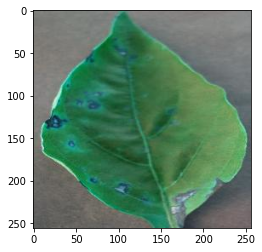

In [14]:
#veg train
print("VEG TRAIN IMAGE")
train_image = cv2.imread(veg_train_df.filepath[40])
imgplot = plt.imshow(train_image)
plt.show()

VEG TEST IMAGE


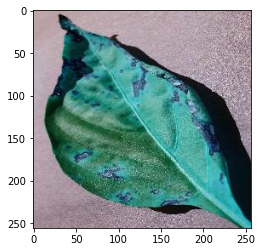

In [15]:
#veg test
print("VEG TEST IMAGE")
test_image = cv2.imread(veg_test_df.filepath[40])
imgplot = plt.imshow(test_image)
plt.show()

In [16]:
x_train = veg_train_df['filepath']
y_train = veg_train_df['label']

In [17]:
x_train_tensor = tf.convert_to_tensor(x_train.values, dtype=tf.string)
y_train_tensor = tf.convert_to_tensor(y_train.values)

In [18]:
x_test = veg_test_df['filepath']
y_test = veg_test_df['label']

In [19]:
x_test_tensor = tf.convert_to_tensor(x_test.values, dtype=tf.string)
y_test_tensor = tf.convert_to_tensor(y_test.values)

In [20]:
train_data = tf.data.Dataset.from_tensor_slices((x_train_tensor, y_train_tensor))
test_data = tf.data.Dataset.from_tensor_slices((x_test_tensor, y_test_tensor))

In [21]:
def map_fn(path, label):
    image = tf.image.decode_jpeg(tf.io.read_file(path))
    return image, label
#apply the function
train_data_img = train_data.map(map_fn)
test_data_img = test_data.map(map_fn)

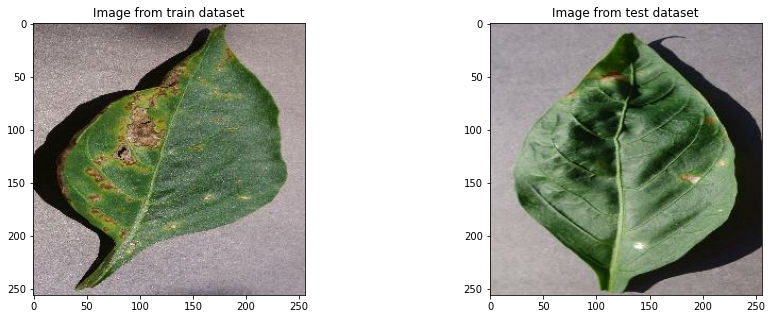

In [22]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
for i,l in train_data_img.take(1):
    ax[0].set_title('Image from train dataset');
    ax[0].imshow(i);
for i,l in test_data_img.take(1):
    ax[1].set_title('Image from test dataset');
    ax[1].imshow(i);

Text(0, 0.5, 'Frequency')

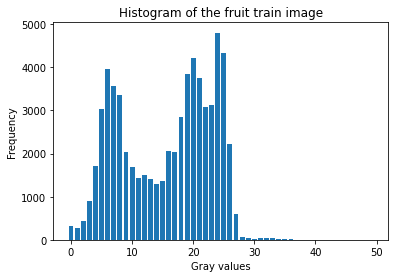

In [23]:
hist = cv2.calcHist([train_image],[0],None,[50],[0,256])

# different methods for displaying a histogram
plt.bar(range(50), hist.ravel())
plt.title('Histogram of the fruit train image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

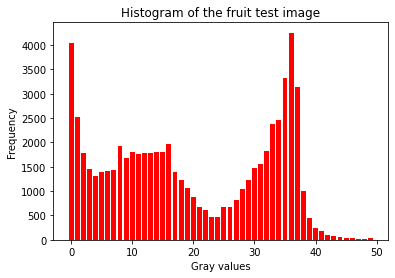

In [24]:
hist = cv2.calcHist([test_image],[0],None,[50],[0,256])

# different methods for displaying a histogram
plt.bar(range(50), hist.ravel(), color='Red')
plt.title('Histogram of the fruit test image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

In [25]:
print("Train image size = ",train_image.shape)
print("Test image size = ",test_image.shape)

Train image size =  (256, 256, 3)
Test image size =  (256, 256, 3)
